In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [3]:
data = pd.read_csv('Fraud_check.csv')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


## Making copy for visualization

In [8]:
data1 = data.copy()

In [9]:
data1 = data1.assign(Tax = pd.cut(data['Taxable.Income'],
                              bins=[ 0, 30000, 100000],
                              labels=['Risky', 'Good']))
data1.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","Taxable.Income":"Taxinc","City.Population":"population","Work.Experience":"experience","Urban":"urban", "Tax":"income"},inplace=True)

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column_name in data1.columns:
    if data1[column_name].dtype == object:
        data1[column_name] = le.fit_transform(data1[column_name])
    else:
        pass

In [11]:
data1.head()

,undergrad,marital,Taxinc,population,experience,urban,income
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good


In [12]:
data1['income'] = le.fit_transform(data1['income'])

In [13]:
fig, ax = plt.subplots(2,3, figsize = (17,12),dpi=600)

sns.distplot(data1.undergrad, ax = ax[0,0])
sns.distplot(data1.marital, ax = ax[0,1])
sns.distplot(data1.Taxinc, ax = ax[0,2])
sns.distplot(data1.population, ax = ax[1,0])
sns.distplot(data1.experience, ax = ax[1,1])
sns.distplot(data1.urban, ax = ax[1,2])

plt.show()

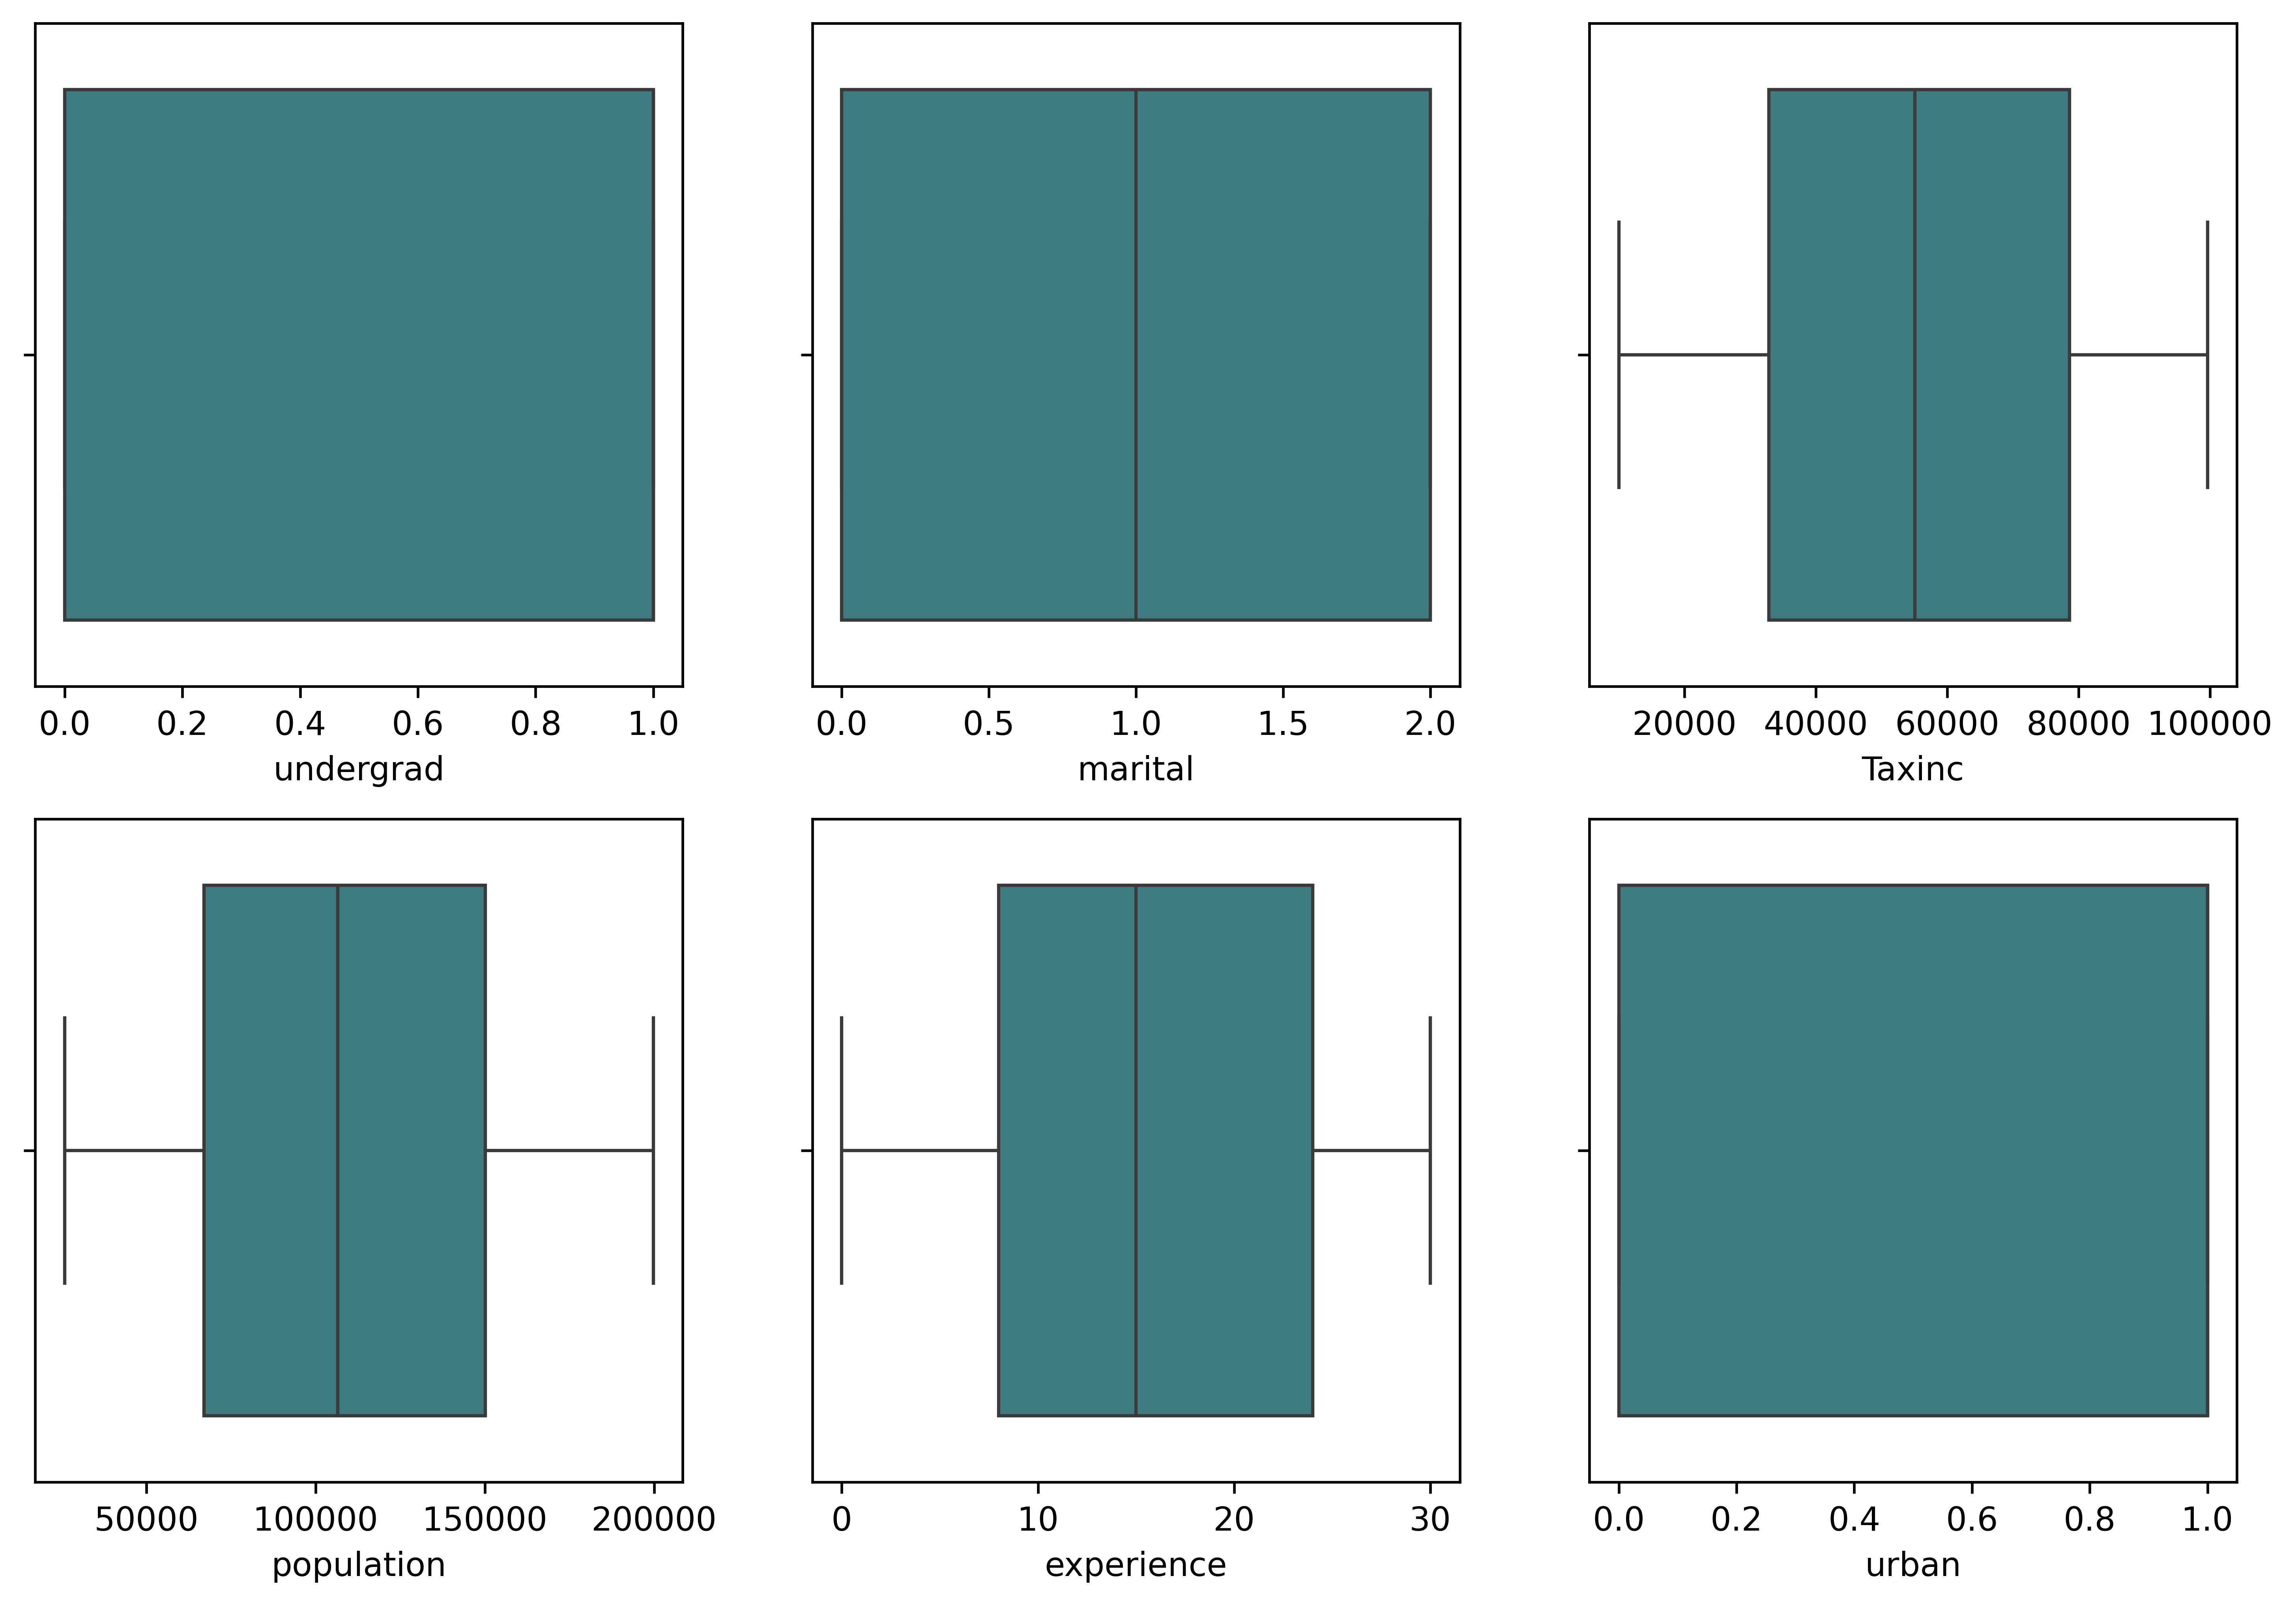

In [14]:
fig, ax = plt.subplots(2,3, figsize = (12,8),dpi=600)

sns.boxplot(data1.undergrad,palette='crest', ax = ax[0,0],orient='h')
sns.boxplot(data1.marital,palette='crest', ax = ax[0,1],orient='h')
sns.boxplot(data1.Taxinc,palette='crest', ax = ax[0,2],orient='h')
sns.boxplot(data1.population,palette='crest', ax = ax[1,0],orient='h')
sns.boxplot(data1.experience,palette='crest', ax = ax[1,1],orient='h')
sns.boxplot(data1.urban,palette='crest', ax = ax[1,2],orient='h')

plt.show()

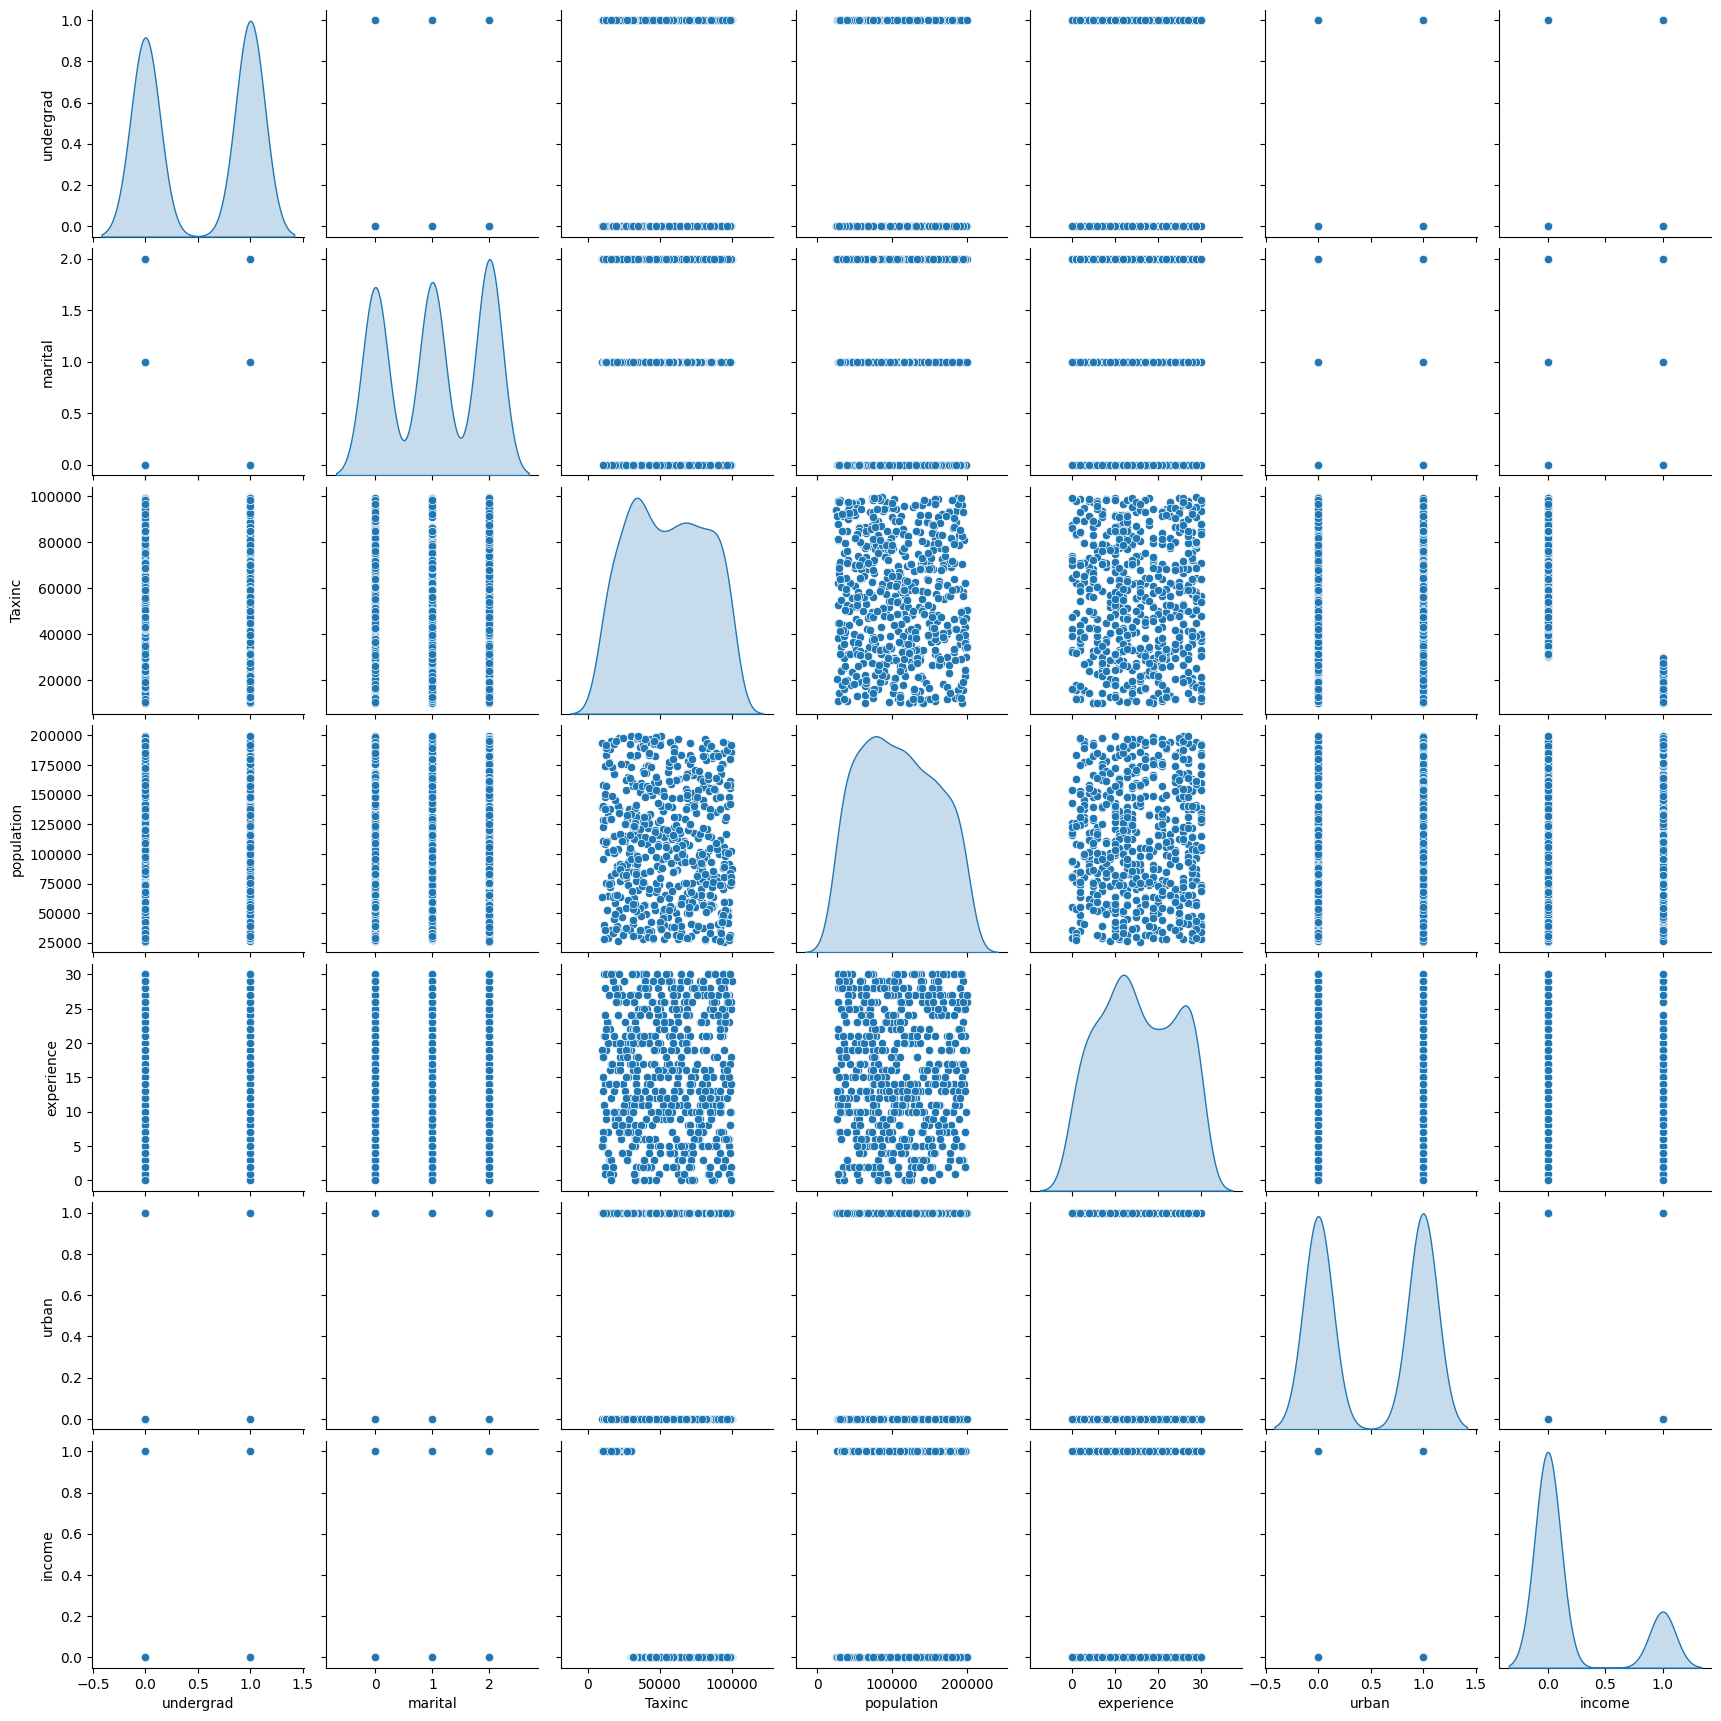

In [16]:
sns.pairplot(data1, diag_kind='kde')

<Axes: >

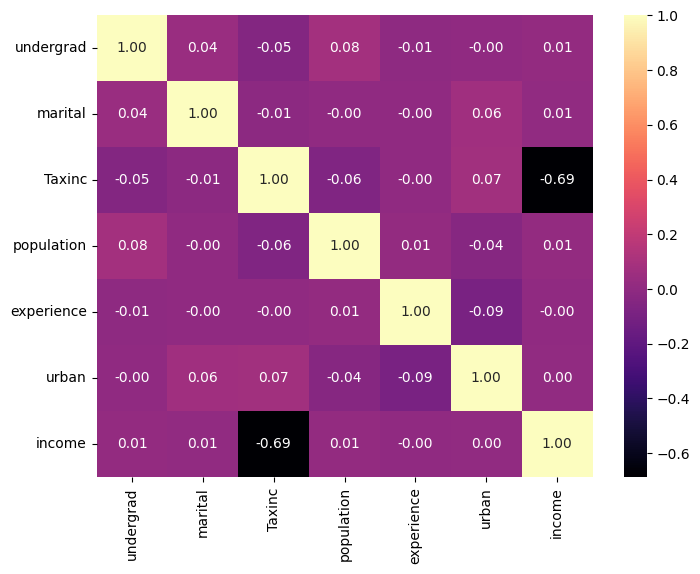

In [15]:
plt.figure(figsize = (8, 6));
sns.heatmap(data1.corr(), cmap='magma', annot=True, fmt=".2f")

In [ ]:
data = pd.get_dummies(data, columns = ['Undergrad', 'Marital.Status', 'Urban' ], drop_first = True)
data.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Taxable.Income          600 non-null    int64
 1   City.Population         600 non-null    int64
 2   Work.Experience         600 non-null    int64
 3   Undergrad_YES           600 non-null    uint8
 4   Marital.Status_Married  600 non-null    uint8
 5   Marital.Status_Single   600 non-null    uint8
 6   Urban_YES               600 non-null    uint8
dtypes: int64(3), uint8(4)
memory usage: 16.5 KB


In [ ]:
data.describe()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333,0.520000,0.323333,0.361667,0.503333
std,26204.827597,49850.075134,8.842147,0.500017,0.468139,0.480884,0.500406
min,10003.000000,25779.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32871.500000,66966.750000,8.000000,0.000000,0.000000,0.000000,0.000000
50%,55074.500000,106493.500000,15.000000,1.000000,0.000000,0.000000,1.000000
75%,78611.750000,150114.250000,24.000000,1.000000,1.000000,1.000000,1.000000
max,99619.000000,199778.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data["TaxInc"] = pd.cut(data["Taxable.Income"], bins=[10002,30000,99620], labels=["Risky","Good"])
data.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc
0,68833,50047,10,0,0,1,1,Good
1,33700,134075,18,1,0,0,1,Good
2,36925,160205,30,0,1,0,1,Good
3,50190,193264,15,1,0,1,1,Good
4,81002,27533,28,0,1,0,0,Good


In [ ]:
data = pd.get_dummies(data, columns=["TaxInc"], drop_first=True)
data.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1


In [ ]:
# Normalization:

def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

In [ ]:
norm_data = norm_func(data.iloc[:,:])
norm_data

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
0,0.656468,0.139472,0.333333,0.0,0.0,1.0,1.0,1.0
1,0.264428,0.622394,0.600000,1.0,0.0,0.0,1.0,1.0
2,0.300415,0.772568,1.000000,0.0,1.0,0.0,1.0,1.0
3,0.448436,0.962563,0.500000,1.0,0.0,1.0,1.0,1.0
4,0.792258,0.010081,0.933333,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
595,0.740236,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.669122,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.416566,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.988540,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0


In [ ]:
x = norm_data.iloc[:,1:7]
y = norm_data.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = "entropy", max_depth = 3)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
y_pred = model.predict(x_test)
pd.Series(y_pred).value_counts()

1.0    119
0.0      1
dtype: int64

In [ ]:
pd.crosstab(y_test, y_pred)

col_0,0.0,1.0
TaxInc_Good,,
0.0,1,27
1.0,0,92


In [ ]:
# Accuracy :
np.mean(y_pred == y_test)

0.775

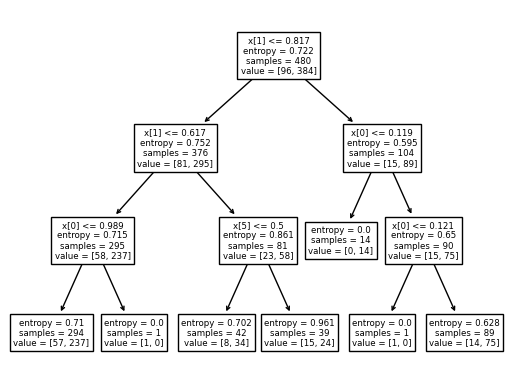

In [ ]:
# Plotting Decision Tree :
from sklearn import tree

tree.plot_tree(model);

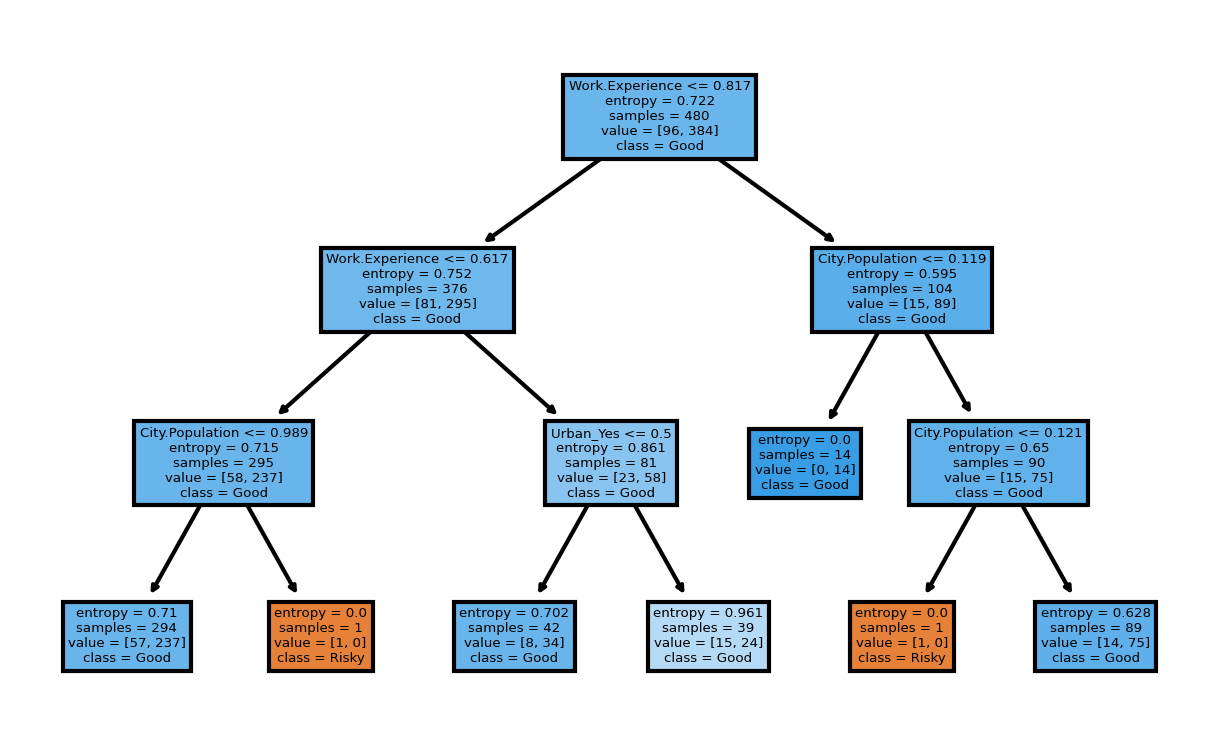

In [ ]:
fn=["City.Population","Work.Experience","Undergrad_YES","Marital.Status_Married","Marital.Status_Single","Urban_Yes"]
cn=["Risky","Good"]
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,3), dpi = 300)
tree.plot_tree(model,
               feature_names = fn,
               class_names=cn,
               filled = True);